In [2]:
import re
import numpy as np
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
file_path = 'C:/Users/Dev/Documents/GitHub/Dona_project/Example_chat_data/WhatsApp_Chat_with_Donna_Patterson.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

pattern = re.compile(r'^(\d{2}/\d{2}/\d{4}), (\d{2}:\d{2}) - (.*?): (.*)$')

messages = []

for line in lines:
    match = pattern.match(line)
    if match:
        date, time, sender, message = match.groups()
        messages.append({
            "date": date,
            "time": time,
            "sender": sender,
            "message": message
        })

for msg in messages[:5]:
    print(msg)


{'date': '08/10/2019', 'time': '21:26', 'sender': 'Donna Patterson', 'message': 'xxxxxx xxxxxxxx'}
{'date': '08/10/2019', 'time': '21:26', 'sender': 'Donna Patterson', 'message': 'xxxxx xx xxxxxxx'}
{'date': '08/10/2019', 'time': '21:53', 'sender': 'Kyle Adkins', 'message': 'xxxx xx xxxxxx xxxx xxxxxx'}
{'date': '08/10/2019', 'time': '21:53', 'sender': 'Kyle Adkins', 'message': 'xxxx xx xxxxx xxxxx x'}
{'date': '08/10/2019', 'time': '21:53', 'sender': 'Kyle Adkins', 'message': 'xxxx xxxx xxxxxxx xxxx xxxx xxxxxxxx xxxxxx xxxx xx x xxxx xxxxxxx xxxxx'}


In [4]:
file_paths=[
    'C:/Users/Dev/Documents/GitHub/Dona_project/Example_chat_data/WhatsApp_Chat_with_Donna_Patterson.txt',
    'C:/Users/Dev/Documents/GitHub/Dona_project/Example_chat_data/WhatsApp_Chat_with_Dr._Heather_Hanson.txt',
    'C:/Users/Dev/Documents/GitHub/Dona_project/Example_chat_data/WhatsApp_Chat_with_Jeffery_Hill_.txt',
    'C:/Users/Dev/Documents/GitHub/Dona_project/Example_chat_data/WhatsApp_Chat_with_Michelle_Morris.txt',
    'C:/Users/Dev/Documents/GitHub/Dona_project/Example_chat_data/WhatsApp_Chat_with_Sherry_Flores.txt'
]

def extract_names(file_paths):
    with open(file_paths,'r',encoding='utf-8') as file:
        text=file.read()
        #matching the sender name beore the first colon in message line
        names=set(re.findall(r'\d{2}/\d{2}/\d{4}, \d{2}:\d{2} - ([^:]+):',text))
        return names
    
name_sets = [extract_names(path) for path in file_paths]
common_names = set.intersection(*name_sets)

print("Common name in all chats:", common_names)
        


Common name in all chats: {'Kyle Adkins'}


In [5]:
donor_name = "Kyle Adkins"

# Function for Reading file and counting donor messages, returning contact and count
def count_donor_messages(file_paths, donor):
    with open(file_paths, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    # extracting the sender name at the start of each message
    pattern = re.compile(r'^\d{2}/\d{2}/\d{4}, \d{2}:\d{2} - (.*?):')

    count = 0
    all_senders = set()

    for line in lines:
        match = pattern.match(line)
        if match:
            sender = match.group(1)
            all_senders.add(sender)
            if sender == donor:
                count += 1

    # Removing donor from sender list to get the other contact
    all_senders.discard(donor)
    contact = all_senders.pop() if all_senders else "Unknown"

    return contact, count

#Dictionary to hold results: {contact_name: message_count}
message_counts = {}

#Going through each file and counting messages from donor
for path in file_paths:
    contact, count = count_donor_messages(path, donor_name)
    message_counts[contact] = count

print(f"\n Message counts for donor: {donor_name}\n")
for contact, count in message_counts.items():
    
    print(f"{donor_name} sent {count} messages to {contact}")



 Message counts for donor: Kyle Adkins

Kyle Adkins sent 2494 messages to Donna Patterson
Kyle Adkins sent 924 messages to Dr. Heather Hanson
Kyle Adkins sent 2144 messages to Jeffery Hill
Kyle Adkins sent 12231 messages to Michelle Morris
Kyle Adkins sent 554 messages to Sherry Flores


In [6]:
# Total messages sent by donor
total_messages = sum(message_counts.values())

#dictionary for percentages
percentage_distribution = {}

for contact, count in message_counts.items():
    percent = (count / total_messages) * 100
    percentage_distribution[contact] = round(percent, 2) 
    
print(f"\n Percentage of messages sent by {donor_name}:\n")
    
for contact, percent in percentage_distribution.items():
       print(f"{donor_name} sent {percent:.2f}% of messages to {contact}")




 Percentage of messages sent by Kyle Adkins:

Kyle Adkins sent 13.59% of messages to Donna Patterson
Kyle Adkins sent 5.04% of messages to Dr. Heather Hanson
Kyle Adkins sent 11.69% of messages to Jeffery Hill
Kyle Adkins sent 66.66% of messages to Michelle Morris
Kyle Adkins sent 3.02% of messages to Sherry Flores


In [7]:
contacts = list(percentage_distribution.keys())
values = list(percentage_distribution.values())

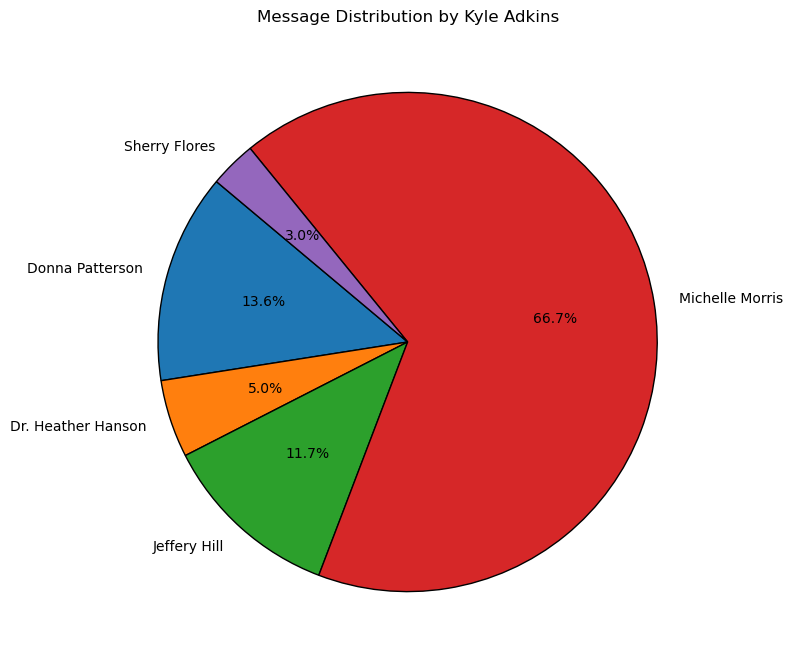

In [8]:
#Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    values,
    labels=contacts,
    #Showing percent on each slice
    autopct='%1.1f%%',  
    startangle=140,     
    wedgeprops={'edgecolor': 'black'}
)
plt.title(f"Message Distribution by {donor_name}")
plt.tight_layout()
plt.show()


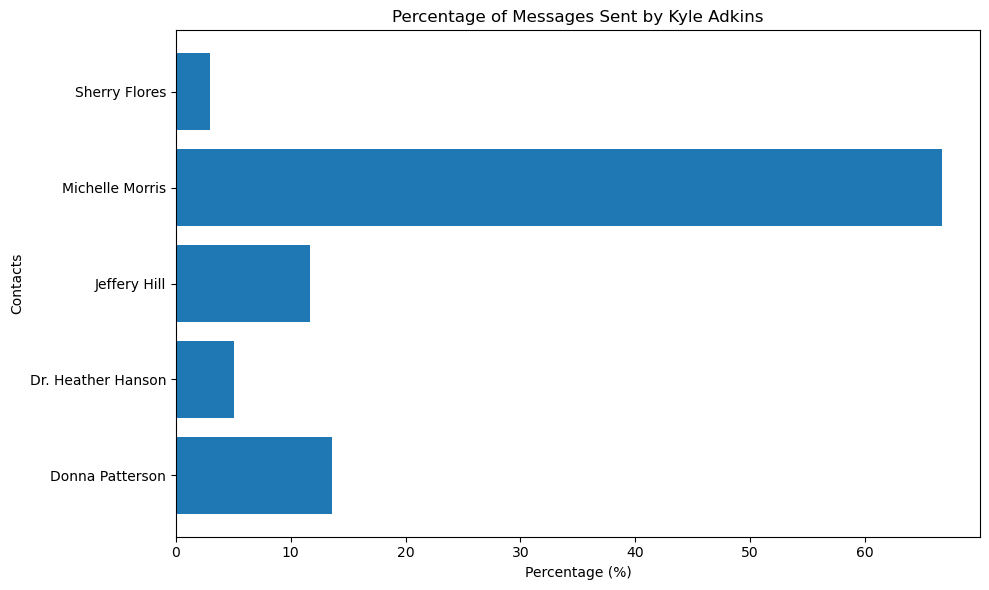

In [9]:
#Horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(contacts, values)

plt.title(f"Percentage of Messages Sent by {donor_name}")
plt.xlabel("Percentage (%)")
plt.ylabel("Contacts")
plt.tight_layout()
plt.show()


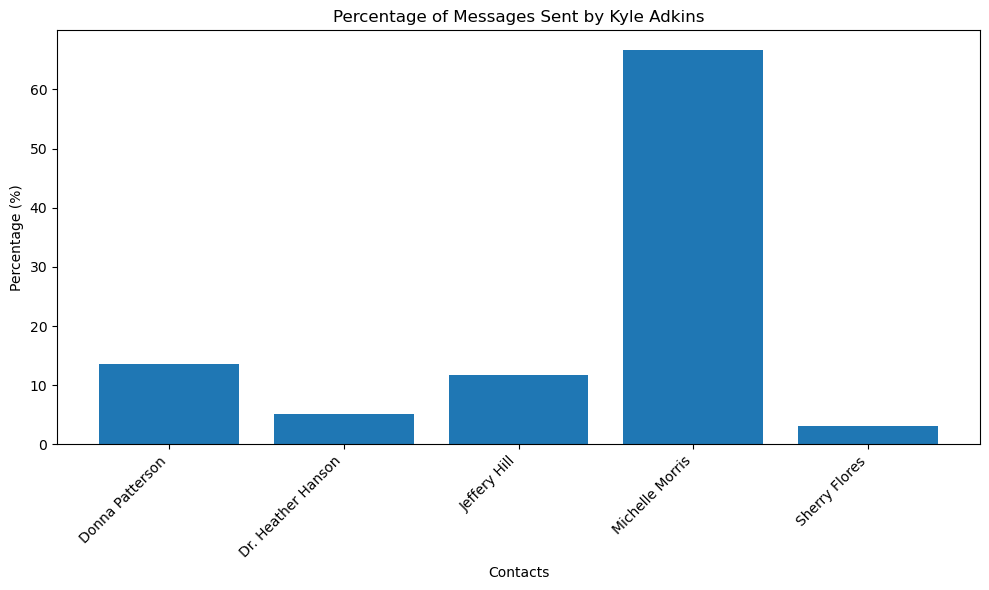

In [10]:
#Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(contacts, values)

plt.title(f"Percentage of Messages Sent by {donor_name}")
plt.ylabel("Percentage (%)")
plt.xlabel("Contacts")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

In [11]:
def plot_lorenz_curve(message_counts):
    values = np.array(list(message_counts.values()))
    sorted_vals = np.sort(values)
    #print(sorted_vals)

    # Calculating cumulative percentages
    cumulative_vals = np.cumsum(sorted_vals)
    cumulative_vals = cumulative_vals / cumulative_vals[-1]

    cumulative_contacts = np.linspace(0, 1, len(sorted_vals) + 1)
    cumulative_msgs = np.insert(cumulative_vals, 0, 0)  

    # Calculating Gini Index 
    k = len(sorted_vals)
    total = sorted_vals.sum()
    weighted_sum = sum((j + 1) * val for j, val in enumerate(sorted_vals))
    gini_index = (2 * weighted_sum) / (k * total) - (k + 1) / k

    print(f"Gini index: {gini_index}")
    
    #Lorenz Curve
    plt.figure(figsize=(8, 6))
    plt.plot(cumulative_contacts, cumulative_msgs, label="Lorenz Curve", color="blue")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Perfect Equality")
    plt.fill_between(cumulative_contacts, cumulative_msgs, cumulative_contacts,
                     color="lightblue", alpha=0.4, label=f"Gini Index = {gini_index:.3f}")

    plt.title("Lorenz Curve of Message Distribution of Donor(Kyle Adkins)")
    plt.xlabel("Cumulative % of Contacts")
    plt.ylabel("Cumulative % of Messages")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Gini index: 0.5433912901291764


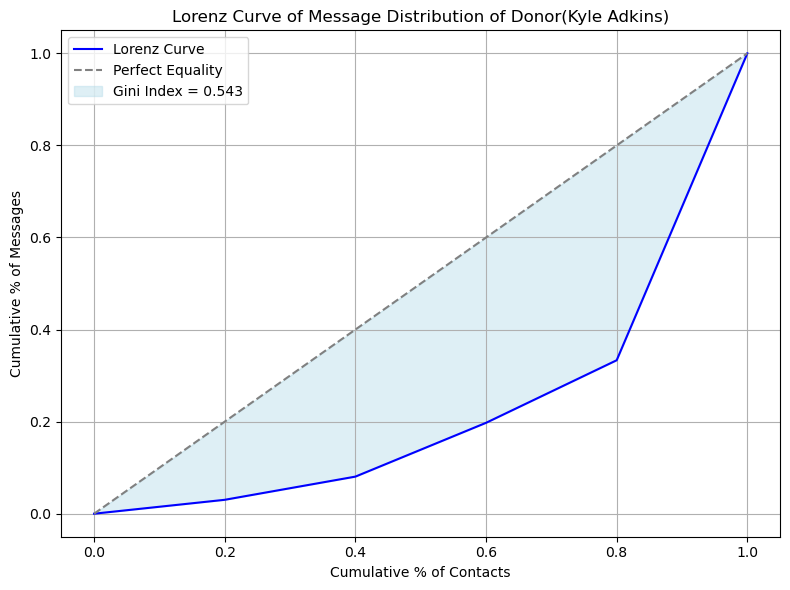

In [12]:
plot_lorenz_curve(message_counts)




In [13]:
def plot_lorenz_percentage(message_counts, donor_name):
    values = np.array(list(message_counts.values()))
    sorted_vals = np.sort(values)

    cumulative_vals = np.cumsum(sorted_vals)
    cumulative_vals = cumulative_vals / cumulative_vals[-1]

    cumulative_contacts = np.linspace(0, 1, len(sorted_vals) + 1)
    cumulative_msgs = np.insert(cumulative_vals, 0, 0)

    # Converting to percentage 
    cumulative_contacts *= 100
    cumulative_msgs *= 100

    # Gini calculation
    k = len(sorted_vals)
    total = sorted_vals.sum()
    weighted_sum = sum((j + 1) * val for j, val in enumerate(sorted_vals))
    gini_index = (2 * weighted_sum) / (k * total) - (k + 1) / k

    plt.figure(figsize=(8, 6))
    plt.plot(cumulative_contacts, cumulative_msgs, label="Lorenz Curve", color='blue', marker='o')
    plt.plot([0, 100], [0, 100], linestyle='--', color='gray', label='Perfect Equality')
    plt.fill_between(cumulative_contacts, cumulative_msgs, cumulative_contacts,
                     color="lightblue", alpha=0.4, label=f"Gini Index = {gini_index:.3f}")
    
    plt.title(f"Lorenz Curve (Percentage) – {donor_name}'s Interaction")
    plt.xlabel("Cumulative % of Contacts")
    plt.ylabel("Cumulative % of Messages")
    plt.xticks(np.arange(0, 110, 10))
    plt.yticks(np.arange(0, 110, 10))
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


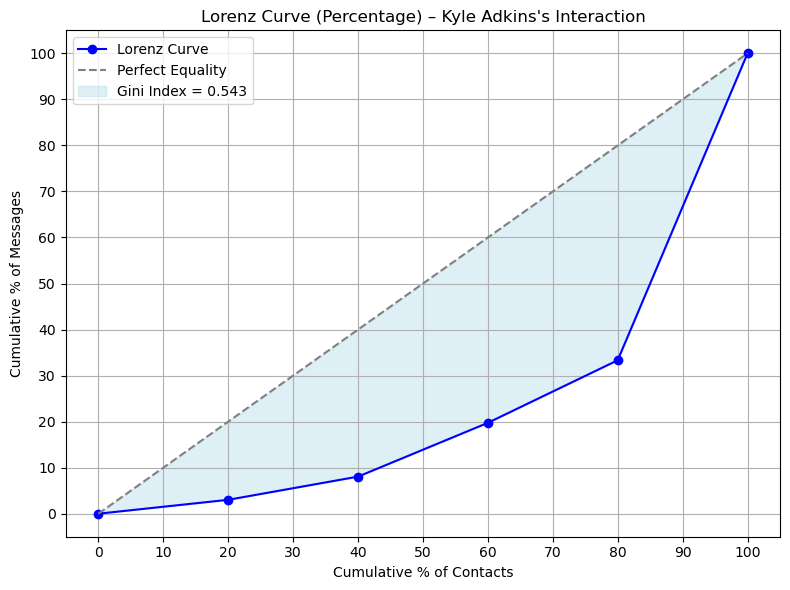

In [14]:
plot_lorenz_percentage(message_counts, "Kyle Adkins")


First of all, I analyzed whatsapp chat files by understanding the Data format (patterns like date,time,sender and message) because my goal was to find common donor name (The name which is common in all the chats) and see how evenly the donor interacted to all his contacts.

To do so i extracted the name of all senders by using regular expressions(regex) pattern and stored them in sets and then i applied intersection between all the stored name to get the donor name and to find how evenly messages are distributed between contacts, I made function to count messages donor sent to each contact and calculated Gini index (where value of gini index 0 means perfect equality, and 1 means extreme inequality) and the result was 0.543 (moderate level of inequality) this means donor sent some people more messages than others. I visualized this using a Lorenz curve, by plotting the cumulative percentage of contacts against the cumulative percentage of messages. Since the curve bends below the diagonal (line of perfect equality) which proves that some contacts got way more messages than others.

So overall, i found out donor name(Kyle Adkins) and Kyle messages were not evenly distributed. The Gini index and Lorenz curve helped me understand and visualize donor communication pattern.


Interactive Widgets

In [15]:
pip install ipywidgets


Note: you may need to restart the kernel to use updated packages.


In [16]:
from ipywidgets import interact

In [17]:
def f(x):
    return x

In [41]:
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [18]:
def greet(name):
    print(f"Hello, {name}!")

interact(greet, name="Type your name here")


interactive(children=(Text(value='Type your name here', description='name'), Output()), _dom_classes=('widget-…

<function __main__.greet(name)>

In [19]:
@interact(x=["apple","orange"])
def show(x):
   return x

interactive(children=(Dropdown(description='x', options=('apple', 'orange'), value='apple'), Output()), _dom_c…

In [20]:
@interact(f,x=[('one',10),('two',20)])
def f(x):
    return x


interactive(children=(Dropdown(description='x', options=(('one', 10), ('two', 20)), value=10), Output()), _dom…

For our data

In [21]:
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.pyplot as plt


In [22]:
@interact(contact=widgets.Dropdown(options=message_counts.keys()))
def show_message_count(contact):
    print(f"Donor sent {message_counts[contact]} messages to {contact}")


interactive(children=(Dropdown(description='contact', options=('Donna Patterson', 'Dr. Heather Hanson', 'Jeffe…

In [23]:
@interact(min_count=(0, max(message_counts.values()), 5))
def filter_contacts(min_count):
    filtered = {k: v for k, v in message_counts.items() if v >= min_count}
    plt.bar(filtered.keys(), filtered.values())
    plt.title(f"Contacts with ≥ {min_count} messages")
    plt.ylabel("Message Count")
    plt.xticks(rotation=45)
    plt.show()


interactive(children=(IntSlider(value=6115, description='min_count', max=12231, step=5), Output()), _dom_class…

In [32]:
@interact(min_count=(0, max(message_counts.values()), 5))
def filter_contacts(min_count):
    filtered = {c: v for c, v in message_counts.items() if v >= min_count}
    plt.figure(figsize=(8, 4))
    plt.barh(list(filtered.keys()), list(filtered.values()), color='skyblue')
    plt.xlabel("Message Count")
    plt.title(f"Contacts with ≥ {min_count} messages")
    plt.tight_layout()
    plt.show()


interactive(children=(IntSlider(value=6115, description='min_count', max=12231, step=5), Output()), _dom_class…

In [33]:
@interact(min_count=(0, max(message_counts.values()), 5))
def filter_pie(min_count):
    filtered = {c: v for c, v in message_counts.items() if v >= min_count}
    plt.figure(figsize=(6, 6))
    plt.pie(filtered.values(), labels=filtered.keys(), autopct='%1.1f%%',
            colors=plt.cm.Paired.colors, startangle=90)
    plt.title(f"Message Share with ≥ {min_count} messages")
    plt.show()


interactive(children=(IntSlider(value=6115, description='min_count', max=12231, step=5), Output()), _dom_class…

In [40]:
def calculate_gini(counts):
    values = sorted(counts.values())
    n = len(values)
    total = sum(values)
    weighted_sum = sum((i + 1) * val for i, val in enumerate(values))
    return (2 * weighted_sum) / (n * total) - (n + 1) / n

@interact(show_lorenz=widgets.Checkbox(value=False, description="Show Lorenz Curve"))
def display_lorenz(show_lorenz):
    if show_lorenz:
        values = np.array(sorted(message_counts.values()))
        cumulative = np.cumsum(values) / values.sum()
        cumulative = np.insert(cumulative, 0, 0)
        contacts = np.linspace(0, 1, len(values) + 1)

        gini = calculate_gini(message_counts)

        plt.figure(figsize=(6, 5))
        plt.plot(contacts * 100, cumulative * 100, label='Lorenz Curve', color='blue')
        plt.plot([0, 100], [0, 100], linestyle='--', color='gray', label='Perfect Equality')
        plt.fill_between(contacts * 100, contacts * 100, cumulative * 100, color='lightblue', alpha=0.3)
        plt.title(f"Lorenz Curve (Gini Index = {gini:.3f})")
        plt.xlabel("Cumulative % of Contacts")
        plt.ylabel("Cumulative % of Messages")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("Check box to see the Lorenz Curve.")

        

interactive(children=(Checkbox(value=False, description='Show Lorenz Curve'), Output()), _dom_classes=('widget…

In [37]:
donor_message_counts = {
    "Donor A": {"C1": 50, "C2": 100, "C3": 300},
    "Donor B": {"C1": 80, "C2": 90, "C3": 30},
    "Donor C": {"C1": 10, "C2": 10, "C3": 10},
}


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

def calculate_gini(counts):
    values = sorted(counts.values())
    n = len(values)
    total = sum(values)
    weighted_sum = sum((i + 1) * val for i, val in enumerate(values))
    return (2 * weighted_sum) / (n * total) - (n + 1) / n

def get_lorenz_points(counts):
    values = np.array(sorted(counts.values()))
    cumulative_msgs = np.cumsum(values) / values.sum()
    cumulative_msgs = np.insert(cumulative_msgs, 0, 0)
    cumulative_contacts = np.linspace(0, 1, len(values) + 1)
    return cumulative_contacts, cumulative_msgs


In [39]:
@interact(donor=widgets.Dropdown(options=list(donor_message_counts.keys()), description="Select Donor"))
def plot_lorenz_for_donor(donor):
    counts = donor_message_counts[donor]
    x, y = get_lorenz_points(counts)
    gini = calculate_gini(counts)

    plt.figure(figsize=(6, 5))
    plt.plot(x * 100, y * 100, label='Lorenz Curve', color='blue')
    plt.plot([0, 100], [0, 100], linestyle='--', color='gray', label='Perfect Equality')
    plt.fill_between(x * 100, x * 100, y * 100, color='orange', alpha=0.3)
    plt.title(f"Lorenz Curve for {donor}\nGini Index = {gini:.3f}")
    plt.xlabel("Cumulative % of Contacts")
    plt.ylabel("Cumulative % of Messages")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


interactive(children=(Dropdown(description='Select Donor', options=('Donor A', 'Donor B', 'Donor C'), value='D…

In [25]:
widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider(value=7, continuous_update=False, description='Test:', max=10)

In [26]:
widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

FloatSlider(value=7.5, continuous_update=False, description='Test:', max=10.0)

In [27]:
widgets.Text(
    value='Hello World',
    placeholder='Type something',
    description='String:',
    disabled=False   
)

Text(value='Hello World', description='String:', placeholder='Type something')

In [28]:
widgets.Dropdown(
    options=['1', '2', '3'],
    value='2',
    description='Number:',
    disabled=False,
)

Dropdown(description='Number:', index=1, options=('1', '2', '3'), value='2')

In [29]:
widgets.Checkbox(
    value=False,
    description='Check me',
    disabled=False,
    indent=False
)

Checkbox(value=False, description='Check me', indent=False)